In [2]:
pip install rdkit

  Obtaining dependency information for rdkit from https://files.pythonhosted.org/packages/14/4d/2027ffad94061985754d3c8d11642649d7afb6db373e6154ebbd1eaec39d/rdkit-2023.9.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 591.0 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

In [ ]:
smiles = 'C[C@H]1C[C@@H]2[C@H]([C@H]([C@]3(O2)CC[C@H]4[C@@H]5CC=C6C[C@H](CC[C@@]6([C@H]5C(=O)C4=C3C)C)O)C)NC1'

# Create an RDKit molecule from the SMILES
mol = Chem.MolFromSmiles(smiles)

# Generate a 2D depiction of the molecule
img = Draw.MolToImage(mol, size=(600, 600), kekulize=True)

# Save the image to a file or display it
img.save('molecule1.png', dpi=(600, 600))  # Adjust the DPI for higher resolution
img.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from PIL import Image, ImageDraw, ImageFont

# Replace 'CCO' with your canonical SMILES
smiles = 'C[C@H]1CC[C@H]2[C@@]([C@@H]3CC[C@@H]4[C@H]([C@@H]3CN2C1)C[C@H]5[C@H]4CC(=O)[C@@H]6[C@@]5(CC[C@@H](C6)O)C)(C)O'


# Create an RDKit molecule from the SMILES
mol = Chem.MolFromSmiles(smiles)

# Generate 2D coordinates for the molecule
AllChem.Compute2DCoords(mol)

# Set the drawing options for better quality
Draw.DrawingOptions.atomLabelFontSize = 14
Draw.DrawingOptions.bondLineWidth = 1.5

# Generate a higher resolution 2D depiction of the molecule
img = Draw.MolToImage(mol, size=(1200, 1200), kekulize=True)


# Save the image to a file or display it
img.save('imperialine.png', dpi=(1200, 1200))
img.show()


In [ ]:
from PIL import Image, ImageDraw
img = Image.open("/content/veratramine.png")
draw = ImageDraw.Draw(img)

txt = "Best platform"
draw.text((0, 0), txt, fill=(255, 0, 0))
img.save('graph26.png')
img.show()

FileNotFoundError: ignored

# **Calculating molecular fingerprints using padelpy**

# **Install padelpy**

In [ ]:
! pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 64.7 MB/s eta 0:00:00


# **Prepare fingerprint XML**

### **Download fingerprint XML files**

In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2023-11-26 05:52:25--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2023-11-26 05:52:25--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2023-11-26 05:52:26 (117 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xml

### **List and sort fingerprint XML files**

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

### **Create a dictionary**

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
fp['AtomPairs2D']

'AtomPairs2DFingerprinter.xml'

# **Load HCV dataset**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('selleckchem_converted_sec.csv')
df


FileNotFoundError: [Errno 2] No such file or directory: 'selleckchem_converted_sec.csv'

In [ ]:
null_counts=df.isnull().sum()
null_counts

mol             2
Mol_ID          0
Formula         2
MolWeight       9
Cat             0
Name            4
Synonyms      597
Target        121
Form         1223
CAS          1163
dtype: int64

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column of interest
rows_with_missing_values = df['mol'].isnull()
df_rows = df[~rows_with_missing_values]

# Further processing or analysis with df_without_missing_rows
df_rows

,mol,Mol_ID,Formula,MolWeight,Cat,Name,Synonyms,Target,Form,CAS
0,COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC=C(F)C(Cl)=C3)...,1,C22H24ClFN4O3,446.902363,S1025,Gefitinib (ZD1839),NaN,EGFR,Free Base,184475-35-2
1,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,2,C51H79NO13,914.171860,S1039,Rapamycin (Sirolimus),N/A,mTOR,Free Base,53123-88-9
2,CO[C@H]1C[C@H](C)CC2=C(NCC=C)C(=O)C=C(NC(=O)\\...,3,C31H43N3O8,585.688420,S1141,17-AAG (Tanespimycin),N/A,HSP,Free Base,75747-14-7
3,Cl.CO[C@H]1C[C@H](C)CC2=C(NCCN(C)C)C(=O)C=C(NC...,4,C32H49ClN4O8,653.206460,S1142,17-DMAG HCl (Alvespimycin),NSC 707545,HSP,Hydrochloride,467214-21-7
4,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@]1(C)C2[C@H...,5,C43H53NO14,807.879220,S1148,Docetaxel (Taxotere),N/A,Microtubule Associated,Free Base,114977-28-5
...,...,...,...,...,...,...,...,...,...,...
2560,CSCC[C@H](NC(=O)[C@H](CC1=CC=C(OS(O)(=O)=O)C=C...,2562,C49H62N10O16S3,1143.268980,P1032,CCK Octapeptide (Sincalide),Free base,25126-32-3,NaN,NaN
2561,[H]N[C@@H](CC1=CC=C(O)C=C1)C(=O)N1CCC[C@H]1C(=...,2563,C189H285N55O57S,4271.684500,P1122,Neuropeptide Y,Free base,90880-35-6,NaN,NaN
2562,[H]N([H])C(=NC([H])([H])C([H])([H])C([H])([H])...,2564,C63H98N18O13S,1347.630020,P1129,Substance P,Free base,33507-63-0,NaN,NaN
2563,N[C@H]1CSSC[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@...,2566,C46H65N15O12S2,1084.231600,P1020,Argpressin Acetate,Acetate,113-79-1,NaN,NaN


In [ ]:
null_counts=df_rows.isnull().sum()
null_counts

mol             0
Mol_ID          0
Formula         0
MolWeight       7
Cat             0
Name            4
Synonyms      597
Target        121
Form         1221
CAS          1161
dtype: int64

# **Prepare data subset as input to PaDEL**

In [ ]:
df2 = pd.concat( [df_rows['mol'],df_rows['Cat']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,mol,Cat
0,COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC=C(F)C(Cl)=C3)...,S1025
1,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,S1039
2,CO[C@H]1C[C@H](C)CC2=C(NCC=C)C(=O)C=C(NC(=O)\\...,S1141
3,Cl.CO[C@H]1C[C@H](C)CC2=C(NCCN(C)C)C(=O)C=C(NC...,S1142
4,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@]1(C)C2[C@H...,S1148
...,...,...
2560,CSCC[C@H](NC(=O)[C@H](CC1=CC=C(OS(O)(=O)=O)C=C...,P1032
2561,[H]N[C@@H](CC1=CC=C(O)C=C1)C(=O)N1CCC[C@H]1C(=...,P1122
2562,[H]N([H])C(=NC([H])([H])C([H])([H])C([H])([H])...,P1129
2563,N[C@H]1CSSC[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@...,P1020


In [ ]:
null_counts = df2.isnull().sum()
null_counts

mol    0
Cat    0
dtype: int64

# **Calculate descriptors**

There are 12 fingerprint types in PaDEL. To calculate all 12, make sure to make adjustments to the ***descriptortypes*** input argument to any of the ones in the ***fp*** dictionary variable as shown above, e.g. *SubstructureFingerprintCount.xml*

In [ ]:
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

# **Display calculated fingerprints**

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,S1025,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S1039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S1141,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S1142,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S1148,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,P1032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2559,P1122,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2560,P1129,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2561,P1020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
null_counts = descriptors.isnull().sum()
null_counts

Name            0
PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 882, dtype: int64

In [ ]:
# Check for missing values in each row
rows_with_missing_values = descriptors.isnull().any(axis=1)
print(rows_with_missing_values)


0       False
1       False
2       False
3       False
4       False
        ...  
2558    False
2559    False
2560    False
2561    False
2562    False
Length: 2563, dtype: bool


In [ ]:
descriptors.dropna(inplace=True)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,S1025,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S1039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S1141,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S1142,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S1148,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,P1032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2559,P1122,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2560,P1129,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2561,P1020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
descriptors.to_csv('Testing_compounds_set.csv', index=False)

In [ ]:
df4= pd.read_csv('Testing_compounds_set.csv')
df4

NameError: ignored

In [ ]:
from keras.api._v2.keras import optimizers

In [ ]:
pip install tensorflow_addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
from tensorflow_addons.metrics import RSquare

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [ ]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
pip install keras

# The main architecture of the model Starts from here

## loading the training dataset

In [5]:
import pandas as pd
df5= pd.read_csv('TNF-alpha_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df5

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.570248
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.999566
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.794254
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.318759
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.032452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
949,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.158328
950,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.420216
951,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.548214


In [6]:
X = df5.iloc[:,:-1]
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
949,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
950,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
951,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## variance thresholding on the training dataset

In [7]:
from sklearn.feature_selection import VarianceThreshold

# Extract the feature names from the DataFrame
feature_names = X.columns

# Convert the DataFrame to a numpy array
X2 = X.values

# Apply VarianceThreshold
selection = VarianceThreshold(threshold=(.9 * (1 - .9)))
X2_selected = selection.fit_transform(X2)

# Get the indices of the selected features
selected_indices = selection.get_support(indices=True)

# Get the corresponding feature names
selected_feature_names = feature_names[selected_indices]

# Convert the transformed array back to DataFrame
X_selected = pd.DataFrame(X2_selected, columns=selected_feature_names)
X_selected

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP735,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP821
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,0,1,0,1,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0
949,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
950,1,1,1,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
951,1,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0


## loading the testing dataset which was produced using padelpy(pubchem Fingerprint) Codes are mentioned above

In [8]:
df4= pd.read_csv('Testing_compounds_set.csv')
df4

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,S1025,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S1039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S1141,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S1142,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S1148,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,P1032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2559,P1122,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2560,P1129,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2561,P1020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Store the first column of the descriptors dataset
first_column = df4.iloc[:, 0]
first_column

0       S1025
1       S1039
2       S1141
3       S1142
4       S1148
        ...  
2558    P1032
2559    P1122
2560    P1129
2561    P1020
2562    S0922
Name: Name, Length: 2563, dtype: object

In [10]:
df4 = df4.iloc[:, 1:]
df4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2559,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2560,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2561,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## variance thresholding on the testing dataset

In [11]:
# Extract the feature names from the DataFrame
feature_names = df4.columns

# Convert the DataFrame to a numpy array
X6 = df4.values

# Apply VarianceThreshold
selection = VarianceThreshold(threshold=(.9 * (1 - .9)))
X6_selected = selection.fit_transform(X6)

# Get the indices of the selected features
selected_indices = selection.get_support(indices=True)

# Get the corresponding feature names
selected_feature_names2 = feature_names[selected_indices]

# Convert the transformed array back to DataFrame
X6_selected = pd.DataFrame(X6_selected, columns=selected_feature_names2)
X6_selected

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,...,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP824,PubchemFP860
0,1,1,0,1,1,0,1,1,1,1,...,1,0,1,0,1,0,0,0,1,0
1,1,0,0,1,1,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,0,0,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2559,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2560,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2561,1,0,0,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [12]:
column_names_list = X_selected.columns.tolist()

print(column_names_list)

['PubchemFP2', 'PubchemFP12', 'PubchemFP16', 'PubchemFP19', 'PubchemFP20', 'PubchemFP23', 'PubchemFP33', 'PubchemFP37', 'PubchemFP143', 'PubchemFP145', 'PubchemFP146', 'PubchemFP150', 'PubchemFP152', 'PubchemFP153', 'PubchemFP157', 'PubchemFP159', 'PubchemFP160', 'PubchemFP180', 'PubchemFP181', 'PubchemFP186', 'PubchemFP187', 'PubchemFP188', 'PubchemFP192', 'PubchemFP193', 'PubchemFP199', 'PubchemFP256', 'PubchemFP258', 'PubchemFP259', 'PubchemFP261', 'PubchemFP287', 'PubchemFP293', 'PubchemFP294', 'PubchemFP299', 'PubchemFP300', 'PubchemFP305', 'PubchemFP308', 'PubchemFP336', 'PubchemFP338', 'PubchemFP341', 'PubchemFP342', 'PubchemFP345', 'PubchemFP346', 'PubchemFP353', 'PubchemFP357', 'PubchemFP358', 'PubchemFP362', 'PubchemFP364', 'PubchemFP365', 'PubchemFP366', 'PubchemFP368', 'PubchemFP372', 'PubchemFP373', 'PubchemFP374', 'PubchemFP375', 'PubchemFP376', 'PubchemFP377', 'PubchemFP378', 'PubchemFP379', 'PubchemFP380', 'PubchemFP381', 'PubchemFP382', 'PubchemFP383', 'PubchemFP385', 

In [13]:
column_names_list = X6_selected.columns.tolist()

print(column_names_list)


['PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP11', 'PubchemFP12', 'PubchemFP13', 'PubchemFP14', 'PubchemFP15', 'PubchemFP16', 'PubchemFP19', 'PubchemFP20', 'PubchemFP21', 'PubchemFP143', 'PubchemFP144', 'PubchemFP145', 'PubchemFP146', 'PubchemFP150', 'PubchemFP178', 'PubchemFP179', 'PubchemFP180', 'PubchemFP181', 'PubchemFP182', 'PubchemFP184', 'PubchemFP185', 'PubchemFP186', 'PubchemFP188', 'PubchemFP192', 'PubchemFP193', 'PubchemFP199', 'PubchemFP255', 'PubchemFP256', 'PubchemFP257', 'PubchemFP285', 'PubchemFP299', 'PubchemFP308', 'PubchemFP333', 'PubchemFP334', 'PubchemFP335', 'PubchemFP337', 'PubchemFP338', 'PubchemFP339', 'PubchemFP340', 'PubchemFP341', 'PubchemFP345', 'PubchemFP346', 'PubchemFP347', 'PubchemFP351', 'PubchemFP355', 'PubchemFP356', 'PubchemFP357', 'PubchemFP358', 'PubchemFP365', 'PubchemFP366', 'PubchemFP367', 'PubchemFP370', 'PubchemFP371', 'PubchemFP373', 'PubchemFP374', 'PubchemFP375', 'PubchemFP376', 'PubchemFP377', 'PubchemFP380', 'PubchemFP381', 'Pubch

In [14]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'X'
column_names= ['PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP11', 'PubchemFP12', 'PubchemFP13', 'PubchemFP14', 'PubchemFP15', 'PubchemFP16', 'PubchemFP19', 'PubchemFP20', 'PubchemFP21', 'PubchemFP143', 'PubchemFP144', 'PubchemFP145', 'PubchemFP146', 'PubchemFP150', 'PubchemFP178', 'PubchemFP179', 'PubchemFP180', 'PubchemFP181', 'PubchemFP182', 'PubchemFP184', 'PubchemFP185', 'PubchemFP186', 'PubchemFP188', 'PubchemFP192', 'PubchemFP193', 'PubchemFP199', 'PubchemFP255', 'PubchemFP256', 'PubchemFP257', 'PubchemFP285', 'PubchemFP299', 'PubchemFP308', 'PubchemFP333', 'PubchemFP334', 'PubchemFP335', 'PubchemFP337', 'PubchemFP338', 'PubchemFP339', 'PubchemFP340', 'PubchemFP341', 'PubchemFP345', 'PubchemFP346', 'PubchemFP347', 'PubchemFP351', 'PubchemFP355', 'PubchemFP356', 'PubchemFP357', 'PubchemFP358', 'PubchemFP365', 'PubchemFP366', 'PubchemFP367', 'PubchemFP370', 'PubchemFP371', 'PubchemFP373', 'PubchemFP374', 'PubchemFP375', 'PubchemFP376', 'PubchemFP377', 'PubchemFP380', 'PubchemFP381', 'PubchemFP382', 'PubchemFP384', 'PubchemFP387', 'PubchemFP390', 'PubchemFP391', 'PubchemFP392', 'PubchemFP393', 'PubchemFP396', 'PubchemFP403', 'PubchemFP405', 'PubchemFP406', 'PubchemFP416', 'PubchemFP418', 'PubchemFP420', 'PubchemFP430', 'PubchemFP431', 'PubchemFP432', 'PubchemFP434', 'PubchemFP437', 'PubchemFP439', 'PubchemFP440', 'PubchemFP441', 'PubchemFP442', 'PubchemFP443', 'PubchemFP446', 'PubchemFP447', 'PubchemFP449', 'PubchemFP450', 'PubchemFP451', 'PubchemFP452', 'PubchemFP453', 'PubchemFP462', 'PubchemFP464', 'PubchemFP470', 'PubchemFP472', 'PubchemFP476', 'PubchemFP482', 'PubchemFP490', 'PubchemFP491', 'PubchemFP493', 'PubchemFP495', 'PubchemFP498', 'PubchemFP502', 'PubchemFP506', 'PubchemFP516', 'PubchemFP520', 'PubchemFP521', 'PubchemFP523', 'PubchemFP524', 'PubchemFP528', 'PubchemFP530', 'PubchemFP535', 'PubchemFP536', 'PubchemFP537', 'PubchemFP538', 'PubchemFP539', 'PubchemFP540', 'PubchemFP541', 'PubchemFP542', 'PubchemFP544', 'PubchemFP545', 'PubchemFP546', 'PubchemFP548', 'PubchemFP549', 'PubchemFP552', 'PubchemFP553', 'PubchemFP555', 'PubchemFP556', 'PubchemFP563', 'PubchemFP564', 'PubchemFP565', 'PubchemFP566', 'PubchemFP567', 'PubchemFP569', 'PubchemFP570', 'PubchemFP571', 'PubchemFP573', 'PubchemFP574', 'PubchemFP575', 'PubchemFP578', 'PubchemFP579', 'PubchemFP580', 'PubchemFP581', 'PubchemFP582', 'PubchemFP584', 'PubchemFP585', 'PubchemFP589', 'PubchemFP590', 'PubchemFP592', 'PubchemFP593', 'PubchemFP594', 'PubchemFP595', 'PubchemFP597', 'PubchemFP599', 'PubchemFP600', 'PubchemFP602', 'PubchemFP603', 'PubchemFP604', 'PubchemFP606', 'PubchemFP607', 'PubchemFP608', 'PubchemFP610', 'PubchemFP611', 'PubchemFP613', 'PubchemFP614', 'PubchemFP617', 'PubchemFP618', 'PubchemFP619', 'PubchemFP620', 'PubchemFP623', 'PubchemFP625', 'PubchemFP626', 'PubchemFP628', 'PubchemFP630', 'PubchemFP631', 'PubchemFP632', 'PubchemFP633', 'PubchemFP634', 'PubchemFP637', 'PubchemFP638', 'PubchemFP639', 'PubchemFP640', 'PubchemFP641', 'PubchemFP642', 'PubchemFP643', 'PubchemFP645', 'PubchemFP646', 'PubchemFP651', 'PubchemFP653', 'PubchemFP655', 'PubchemFP656', 'PubchemFP657', 'PubchemFP659', 'PubchemFP660', 'PubchemFP661', 'PubchemFP662', 'PubchemFP663', 'PubchemFP664', 'PubchemFP665', 'PubchemFP666', 'PubchemFP667', 'PubchemFP668', 'PubchemFP671', 'PubchemFP672', 'PubchemFP677', 'PubchemFP678', 'PubchemFP679', 'PubchemFP680', 'PubchemFP681', 'PubchemFP682', 'PubchemFP683', 'PubchemFP684', 'PubchemFP686', 'PubchemFP688', 'PubchemFP689', 'PubchemFP690', 'PubchemFP691', 'PubchemFP692', 'PubchemFP693', 'PubchemFP696', 'PubchemFP697', 'PubchemFP698', 'PubchemFP699', 'PubchemFP700', 'PubchemFP701', 'PubchemFP702', 'PubchemFP704', 'PubchemFP705', 'PubchemFP708', 'PubchemFP709', 'PubchemFP710', 'PubchemFP711', 'PubchemFP712', 'PubchemFP714', 'PubchemFP735', 'PubchemFP740', 'PubchemFP755', 'PubchemFP756', 'PubchemFP761', 'PubchemFP776', 'PubchemFP777', 'PubchemFP797', 'PubchemFP798', 'PubchemFP803', 'PubchemFP818', 'PubchemFP819', 'PubchemFP824', 'PubchemFP860']
#filtered_df = X[column_names]

# Alternatively, you can use the .loc accessor to filter the columns
filtered_df = X.loc[:, column_names]

# Print the filtered dataset
filtered_df


,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,...,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP824,PubchemFP860
0,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,0,1,1,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
949,1,1,1,1,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
950,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
951,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [15]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'X'
column_names=['PubchemFP2', 'PubchemFP12', 'PubchemFP16', 'PubchemFP19', 'PubchemFP20', 'PubchemFP23', 'PubchemFP33', 'PubchemFP37', 'PubchemFP143', 'PubchemFP145', 'PubchemFP146', 'PubchemFP150', 'PubchemFP152', 'PubchemFP153', 'PubchemFP157', 'PubchemFP159', 'PubchemFP160', 'PubchemFP180', 'PubchemFP181', 'PubchemFP186', 'PubchemFP187', 'PubchemFP188', 'PubchemFP192', 'PubchemFP193', 'PubchemFP199', 'PubchemFP256', 'PubchemFP258', 'PubchemFP259', 'PubchemFP261', 'PubchemFP287', 'PubchemFP293', 'PubchemFP294', 'PubchemFP299', 'PubchemFP300', 'PubchemFP305', 'PubchemFP308', 'PubchemFP336', 'PubchemFP338', 'PubchemFP341', 'PubchemFP342', 'PubchemFP345', 'PubchemFP346', 'PubchemFP353', 'PubchemFP357', 'PubchemFP358', 'PubchemFP362', 'PubchemFP364', 'PubchemFP365', 'PubchemFP366', 'PubchemFP368', 'PubchemFP372', 'PubchemFP373', 'PubchemFP374', 'PubchemFP375', 'PubchemFP376', 'PubchemFP377', 'PubchemFP378', 'PubchemFP379', 'PubchemFP380', 'PubchemFP381', 'PubchemFP382', 'PubchemFP383', 'PubchemFP385', 'PubchemFP386', 'PubchemFP387', 'PubchemFP389', 'PubchemFP391', 'PubchemFP392', 'PubchemFP393', 'PubchemFP396', 'PubchemFP403', 'PubchemFP405', 'PubchemFP406', 'PubchemFP412', 'PubchemFP414', 'PubchemFP417', 'PubchemFP418', 'PubchemFP420', 'PubchemFP422', 'PubchemFP427', 'PubchemFP431', 'PubchemFP435', 'PubchemFP437', 'PubchemFP438', 'PubchemFP439', 'PubchemFP440', 'PubchemFP442', 'PubchemFP443', 'PubchemFP445', 'PubchemFP447', 'PubchemFP449', 'PubchemFP450', 'PubchemFP451', 'PubchemFP452', 'PubchemFP453', 'PubchemFP457', 'PubchemFP459', 'PubchemFP460', 'PubchemFP461', 'PubchemFP465', 'PubchemFP467', 'PubchemFP472', 'PubchemFP476', 'PubchemFP477', 'PubchemFP482', 'PubchemFP483', 'PubchemFP484', 'PubchemFP485', 'PubchemFP487', 'PubchemFP491', 'PubchemFP493', 'PubchemFP495', 'PubchemFP497', 'PubchemFP498', 'PubchemFP499', 'PubchemFP500', 'PubchemFP501', 'PubchemFP502', 'PubchemFP503', 'PubchemFP504', 'PubchemFP506', 'PubchemFP507', 'PubchemFP515', 'PubchemFP519', 'PubchemFP521', 'PubchemFP523', 'PubchemFP528', 'PubchemFP530', 'PubchemFP531', 'PubchemFP532', 'PubchemFP535', 'PubchemFP536', 'PubchemFP538', 'PubchemFP539', 'PubchemFP540', 'PubchemFP541', 'PubchemFP542', 'PubchemFP543', 'PubchemFP545', 'PubchemFP546', 'PubchemFP547', 'PubchemFP548', 'PubchemFP550', 'PubchemFP553', 'PubchemFP555', 'PubchemFP560', 'PubchemFP565', 'PubchemFP566', 'PubchemFP567', 'PubchemFP569', 'PubchemFP572', 'PubchemFP573', 'PubchemFP574', 'PubchemFP576', 'PubchemFP577', 'PubchemFP579', 'PubchemFP580', 'PubchemFP585', 'PubchemFP586', 'PubchemFP589', 'PubchemFP591', 'PubchemFP593', 'PubchemFP594', 'PubchemFP596', 'PubchemFP597', 'PubchemFP598', 'PubchemFP600', 'PubchemFP601', 'PubchemFP602', 'PubchemFP604', 'PubchemFP606', 'PubchemFP611', 'PubchemFP614', 'PubchemFP615', 'PubchemFP616', 'PubchemFP617', 'PubchemFP619', 'PubchemFP621', 'PubchemFP623', 'PubchemFP624', 'PubchemFP626', 'PubchemFP636', 'PubchemFP637', 'PubchemFP638', 'PubchemFP641', 'PubchemFP643', 'PubchemFP644', 'PubchemFP645', 'PubchemFP646', 'PubchemFP647', 'PubchemFP650', 'PubchemFP651', 'PubchemFP654', 'PubchemFP655', 'PubchemFP657', 'PubchemFP659', 'PubchemFP662', 'PubchemFP665', 'PubchemFP666', 'PubchemFP667', 'PubchemFP671', 'PubchemFP672', 'PubchemFP673', 'PubchemFP674', 'PubchemFP680', 'PubchemFP682', 'PubchemFP684', 'PubchemFP685', 'PubchemFP686', 'PubchemFP689', 'PubchemFP691', 'PubchemFP692', 'PubchemFP693', 'PubchemFP695', 'PubchemFP696', 'PubchemFP697', 'PubchemFP698', 'PubchemFP699', 'PubchemFP702', 'PubchemFP704', 'PubchemFP712', 'PubchemFP713', 'PubchemFP714', 'PubchemFP716', 'PubchemFP734', 'PubchemFP735', 'PubchemFP755', 'PubchemFP758', 'PubchemFP776', 'PubchemFP777', 'PubchemFP779', 'PubchemFP797', 'PubchemFP798', 'PubchemFP818', 'PubchemFP821']

# Filter out the columns using the list of column names
#filtered_df = X[column_names]

# Alternatively, you can use the .loc accessor to filter the columns
filtered_df2 = df4.loc[:, column_names]

# Print the filtered dataset
filtered_df2

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP735,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP821
0,1,1,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,1,1,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2559,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2560,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2561,0,1,1,1,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [16]:
merged_df = pd.concat([filtered_df, X_selected], axis=1)
merged_df

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,...,PubchemFP735,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP821
0,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,0,1,1,0,1,1,0,1,...,0,1,0,0,0,1,1,0,1,0
949,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
950,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
951,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0


## Final Training dataset for the model

In [17]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'merged_df'
unique_features = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Print the DataFrame with only the unique features
unique_features


,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,...,PubchemFP673,PubchemFP674,PubchemFP685,PubchemFP695,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP758,PubchemFP779,PubchemFP821
0,1,1,0,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,1,1,0,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,1,1,0,1,0
949,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
950,1,1,1,1,1,0,1,1,1,1,...,1,1,0,0,1,0,0,0,0,0
951,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,1,0


In [18]:
merged_df2 = pd.concat([ X6_selected,filtered_df2], axis=1)
merged_df2

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,...,PubchemFP735,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP821
0,1,1,0,1,1,0,1,1,1,1,...,1,0,1,0,1,0,0,1,0,1
1,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,0,0,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,0,0,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
2559,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2560,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2561,1,0,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


## Final testing dataset for the model

In [19]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'merged_df'
unique_features2 = merged_df2.loc[:, ~merged_df2.columns.duplicated()]

# Print the DataFrame with only the unique features
unique_features2

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,...,PubchemFP673,PubchemFP674,PubchemFP685,PubchemFP695,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP758,PubchemFP779,PubchemFP821
0,1,1,0,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,0,0,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,1
2559,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,0,0,0,0,0,0
2560,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0
2561,1,0,0,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0


In [20]:
# Step 1: Data Preparation
X = unique_features  # Input features from df5 (assuming the last column is the output column)
y = df5.iloc[:, -1]  # Output variable from df5

y

0      6.570248
1      5.999566
2      5.794254
3      7.318759
4      6.032452
         ...   
948    4.522879
949    6.158328
950    7.420216
951    6.548214
952    9.060481
Name: pIC50, Length: 953, dtype: float64

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense,Dropout
!pip install keras-tuner
import keras_tuner as kt

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [24]:
!pip install tensorflow


In [41]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mse",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [106]:
from keras import regularizers
import time

start_time = time.time()

def build_model(hp):
    model = Sequential()
    counter = 0
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    for i in range(hp.Int('num_layers', min_value=3, max_value=8)):
        if counter == 0:
            model.add(Dense(hp.Int('units' + str(i), min_value=300, max_value=800, step=20),
                            activation=hp.Choice('activation' + str(i), values=['relu','elu']),
                            kernel_initializer=hp.Choice('initializer' + str(i), values=['uniform',
                                                                                'glorot_normal', 'glorot_uniform']),
                            kernel_regularizer=regularizers.l1_l2(l1=hp.Float('l1', min_value=1e-5, max_value=1e-2, sampling='log'),
                                                               l2=hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log')),
                            input_dim=342))
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4])))
        else:
            model.add(Dense(hp.Int('units' + str(i), min_value=300, max_value=800, step=20),
                            activation=hp.Choice('activation' + str(i), values=['relu','elu']),
                            kernel_initializer=hp.Choice('initializer' + str(i), values=['uniform',
                                                                                'glorot_normal', 'glorot_uniform']),
                            kernel_regularizer=regularizers.l1_l2(l1=hp.Float('l1', min_value=1e-5, max_value=1e-2, sampling='log'),
                                                               l2=hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log'))
                            ))
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4])))
        counter += 1

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=hp.Choice('optimizer', values=[ 'adam', 'nadam']),
                  loss='mean_absolute_error',
                  metrics=['mse','mae','mape'])

    return model



In [ ]:
tuner=kt.RandomSearch(build_model,
                      objective=['val_mse'],
                      max_trials=5,seed=29,
                      directory='mydire',
                      project_name='itadori')

tuner.search(X_train,y_train,epochs=5,batch_size=20,validation_data=(X_test,y_test))

tuner.get_best_hyperparameters()[0].values

model = tuner.get_best_models(num_models=1)[0]


history=model.fit(X_train,y_train,epochs=120,initial_epoch=5,validation_data=(X_test,y_test))


end_time = time.time()


training_time_seconds = end_time - start_time
print(f"Total training time: {training_time_seconds:.2f} seconds"

In [115]:
tuner=kt.RandomSearch(build_model,
                      objective=['val_mse'],
                      max_trials=5,seed=10,
                      directory='mydire',
                      project_name='eren')

In [116]:
tuner.search(X_train,y_train,epochs=5,batch_size=20,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
multi_objective: 0.8476552367210388

Best multi_objective So Far: 0.7518670558929443
Total elapsed time: 00h 00m 15s


In [117]:
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.0001,
 'num_layers': 7,
 'units0': 360,
 'activation0': 'relu',
 'initializer0': 'glorot_normal',
 'l1': 2.717450600155709e-05,
 'l2': 0.00030794170455443216,
 'dropout0': 0.3,
 'units1': 400,
 'activation1': 'elu',
 'initializer1': 'uniform',
 'dropout1': 0.2,
 'units2': 340,
 'activation2': 'relu',
 'initializer2': 'uniform',
 'dropout2': 0.2,
 'optimizer': 'nadam',
 'units3': 580,
 'activation3': 'elu',
 'initializer3': 'glorot_normal',
 'dropout3': 0.1,
 'units4': 480,
 'activation4': 'relu',
 'initializer4': 'uniform',
 'dropout4': 0.3,
 'units5': 360,
 'activation5': 'elu',
 'initializer5': 'glorot_uniform',
 'dropout5': 0.4,
 'units6': 300,
 'activation6': 'relu',
 'initializer6': 'uniform',
 'dropout6': 0.1}

In [118]:
model = tuner.get_best_models(num_models=1)[0]

In [119]:
start_time = time.time()

history=model.fit(X_train,y_train,epochs=120,initial_epoch=5,validation_data=(X_test,y_test))


end_time = time.time()


training_time_seconds = end_time - start_time
print(f"Total training time: {training_time_seconds:.2f} seconds")

Epoch 6/120
24/24 [==============================] - 1s 15ms/step - loss: 1.9326 - mse: 0.9977 - mae: 0.7633 - mape: 14.1739 - val_loss: 1.8216 - val_mse: 0.9237 - val_mae: 0.6708 - val_mape: 12.2274
Epoch 7/120
24/24 [==============================] - 0s 10ms/step - loss: 1.8919 - mse: 0.9944 - mae: 0.7573 - mape: 14.0724 - val_loss: 2.0673 - val_mse: 1.3823 - val_mae: 0.9512 - val_mape: 17.0361
Epoch 8/120
24/24 [==============================] - 0s 11ms/step - loss: 1.8310 - mse: 0.9393 - mae: 0.7295 - mape: 13.5115 - val_loss: 1.6902 - val_mse: 0.7925 - val_mae: 0.6060 - val_mape: 11.1195
Epoch 9/120
24/24 [==============================] - 0s 10ms/step - loss: 1.7961 - mse: 0.8954 - mae: 0.7267 - mape: 13.2975 - val_loss: 1.6252 - val_mse: 0.6404 - val_mae: 0.5716 - val_mape: 11.7665
Epoch 10/120
24/24 [==============================] - 0s 14ms/step - loss: 1.7019 - mse: 0.8026 - mae: 0.6626 - mape: 12.2971 - val_loss: 1.5541 - val_mse: 0.6926 - val_mae: 0.5298 - val_mape: 10.6908

Epoch 47/120
24/24 [==============================] - 0s 17ms/step - loss: 0.9788 - mse: 0.5428 - mae: 0.5579 - mape: 10.2582 - val_loss: 1.0249 - val_mse: 0.7474 - val_mae: 0.6084 - val_mape: 11.4114
Epoch 48/120
24/24 [==============================] - 0s 14ms/step - loss: 0.9708 - mse: 0.5621 - mae: 0.5578 - mape: 10.3295 - val_loss: 1.1246 - val_mse: 0.9117 - val_mae: 0.7160 - val_mape: 14.8479
Epoch 49/120
24/24 [==============================] - 0s 15ms/step - loss: 0.9976 - mse: 0.6066 - mae: 0.5935 - mape: 11.0726 - val_loss: 0.8972 - val_mse: 0.6063 - val_mae: 0.4968 - val_mape: 9.6929
Epoch 50/120
24/24 [==============================] - 0s 15ms/step - loss: 0.9275 - mse: 0.5044 - mae: 0.5308 - mape: 9.8581 - val_loss: 0.9646 - val_mse: 0.6914 - val_mae: 0.5712 - val_mape: 11.1289
Epoch 51/120
24/24 [==============================] - 0s 16ms/step - loss: 0.9118 - mse: 0.4777 - mae: 0.5228 - mape: 9.5921 - val_loss: 0.8825 - val_mse: 0.5764 - val_mae: 0.4977 - val_mape: 10.248

Epoch 88/120
24/24 [==============================] - 0s 15ms/step - loss: 0.7501 - mse: 0.4895 - mae: 0.5276 - mape: 9.7325 - val_loss: 0.7690 - val_mse: 0.7167 - val_mae: 0.5473 - val_mape: 10.9056
Epoch 89/120
24/24 [==============================] - 0s 16ms/step - loss: 0.7373 - mse: 0.4594 - mae: 0.5168 - mape: 9.5595 - val_loss: 0.7428 - val_mse: 0.6175 - val_mae: 0.5230 - val_mape: 10.2655
Epoch 90/120
24/24 [==============================] - 0s 18ms/step - loss: 0.7432 - mse: 0.4798 - mae: 0.5246 - mape: 9.7321 - val_loss: 0.7431 - val_mse: 0.6516 - val_mae: 0.5257 - val_mape: 10.2608
Epoch 91/120
24/24 [==============================] - 0s 15ms/step - loss: 0.6994 - mse: 0.4364 - mae: 0.4830 - mape: 8.9421 - val_loss: 0.7835 - val_mse: 0.6572 - val_mae: 0.5682 - val_mape: 11.4814
Epoch 92/120
24/24 [==============================] - 0s 19ms/step - loss: 0.7049 - mse: 0.4539 - mae: 0.4910 - mape: 9.1852 - val_loss: 0.7006 - val_mse: 0.5804 - val_mae: 0.4875 - val_mape: 9.7192
E

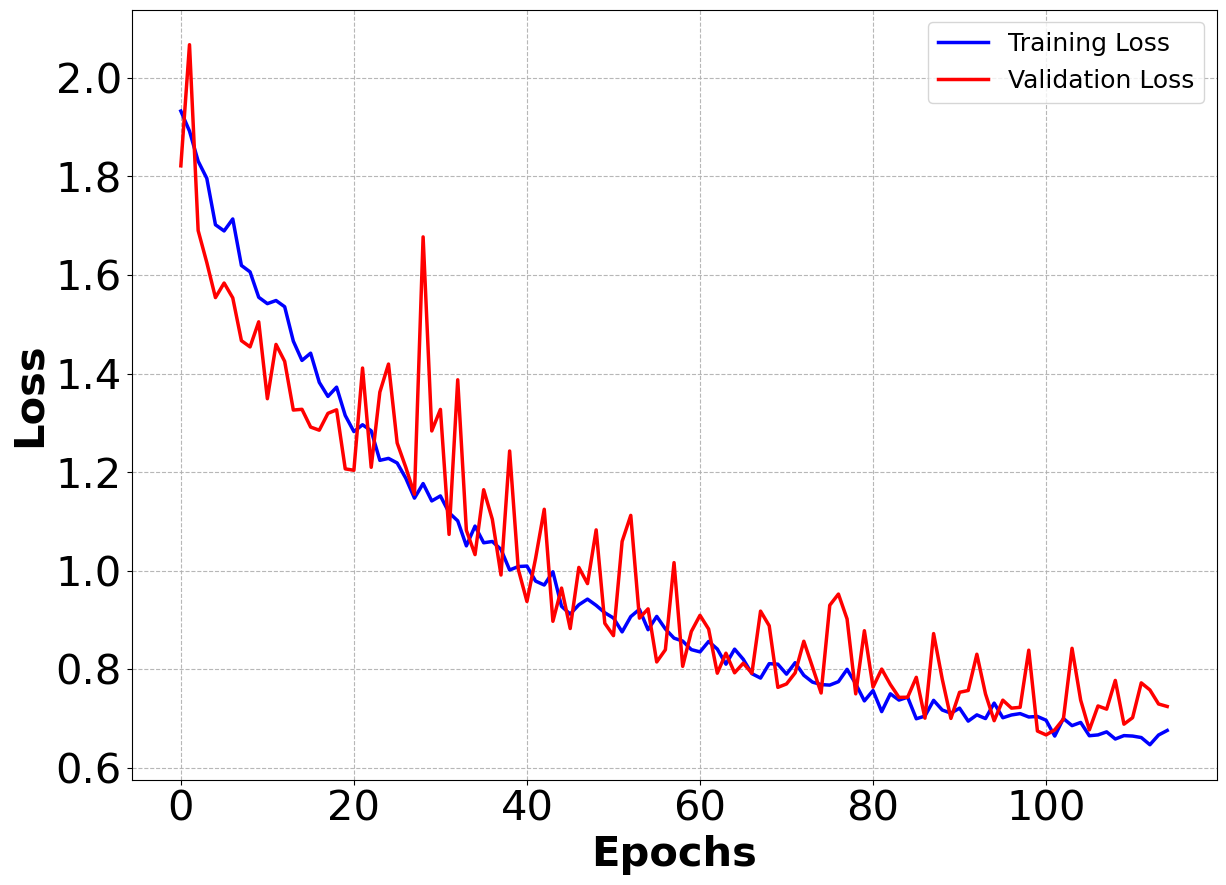

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined 'history' earlier

# Define custom colors and line styles
colors = ['blue', 'red']
line_styles = ['-', '-']

# Increase the figure size
plt.figure(figsize=(14, 10))

# Plot the training and validation loss with custom colors and line styles
plt.plot(history.history['loss'], label='Training Loss', color=colors[0], linestyle=line_styles[0], linewidth=2.5)
plt.plot(history.history['val_loss'], label='Validation Loss', color=colors[1], linestyle=line_styles[1], linewidth=2.5)

# Customize the legend
plt.legend(fontsize=18)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Set labels and adjust font size
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Loss', fontsize=30, fontweight='bold')

# Increase the font size of the ticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Save the plot with increased resolution (dpi)
plt.savefig("loss.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

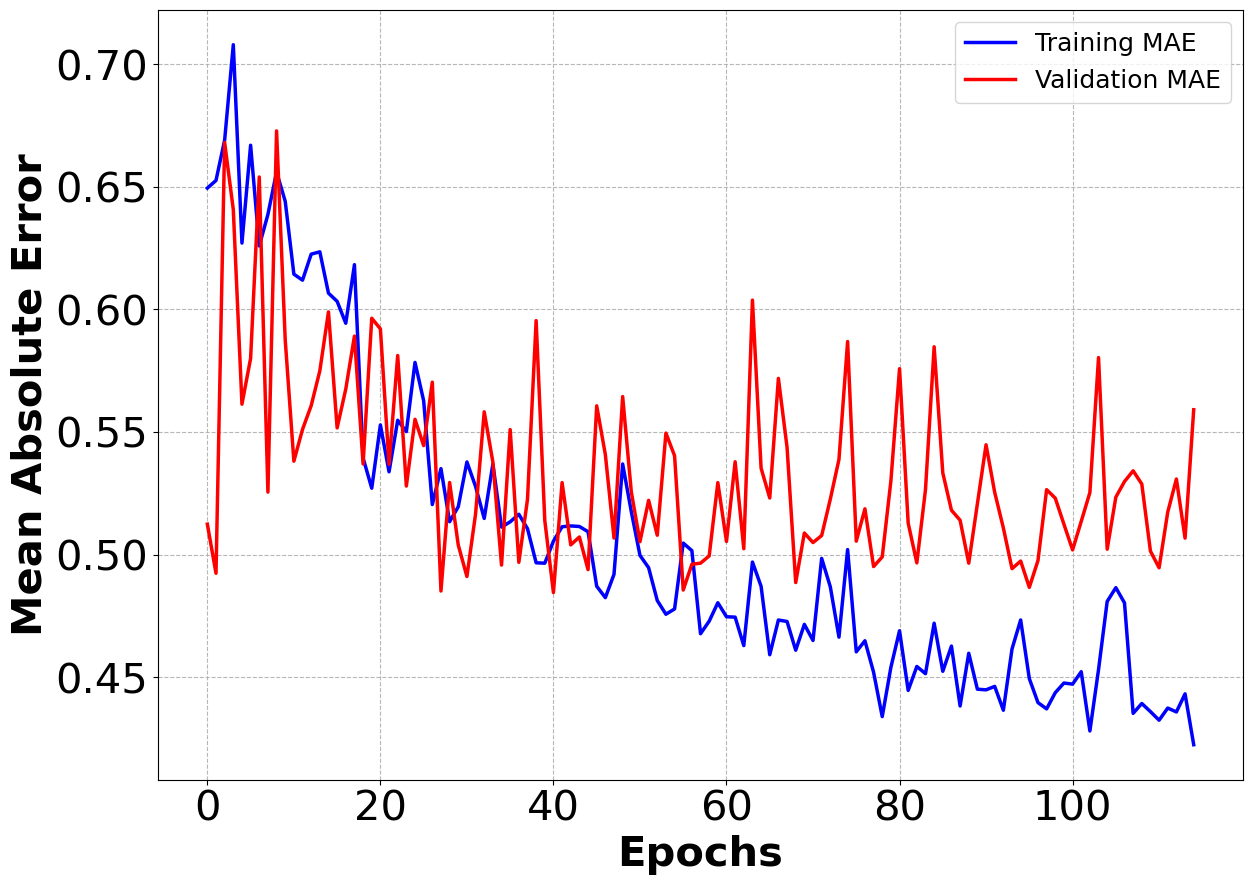

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined 'history' earlier

# Define custom colors and line styles
colors = ['blue', 'red']
line_styles = ['-', '-']

# Increase the figure size
plt.figure(figsize=(14, 10))

# Plot the training and validation MAE with custom colors and line styles
plt.plot(history.history['mae'], label='Training MAE', color=colors[0], linestyle=line_styles[0], linewidth=2.5)
plt.plot(history.history['val_mae'], label='Validation MAE', color=colors[1], linestyle=line_styles[1], linewidth=2.5)

# Customize the legend
plt.legend(fontsize=18)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Set labels and adjust font size
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Mean Absolute Error', fontsize=30, fontweight='bold')

# Increase the font size of the ticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Save the plot with increased resolution (dpi)
plt.savefig("MAE.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


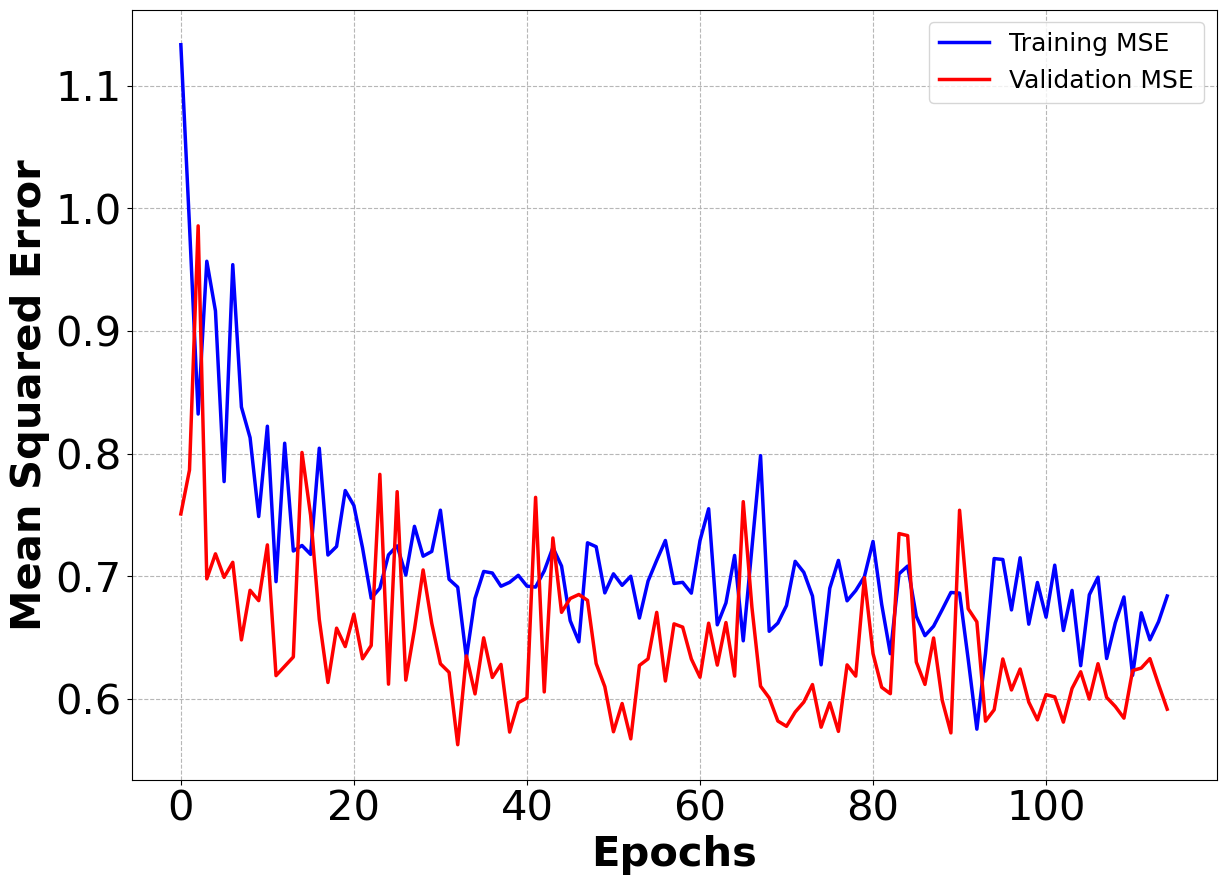

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined 'history' earlier

# Define custom colors and line styles
colors = ['blue', 'red']
line_styles = ['-', '-']

# Increase the figure size
plt.figure(figsize=(14, 10))

# Plot the training and validation MSE with custom colors and line styles
plt.plot(history.history['mse'], label='Training MSE', color=colors[0], linestyle=line_styles[0], linewidth=2.5)
plt.plot(history.history['val_mse'], label='Validation MSE', color=colors[1], linestyle=line_styles[1], linewidth=2.5)

# Customize the legend
plt.legend(fontsize=18)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Set labels and adjust font size
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize=30, fontweight='bold')

# Increase the font size of the ticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Save the plot as a high-quality image (e.g., PNG, PDF)
plt.savefig("MSE.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


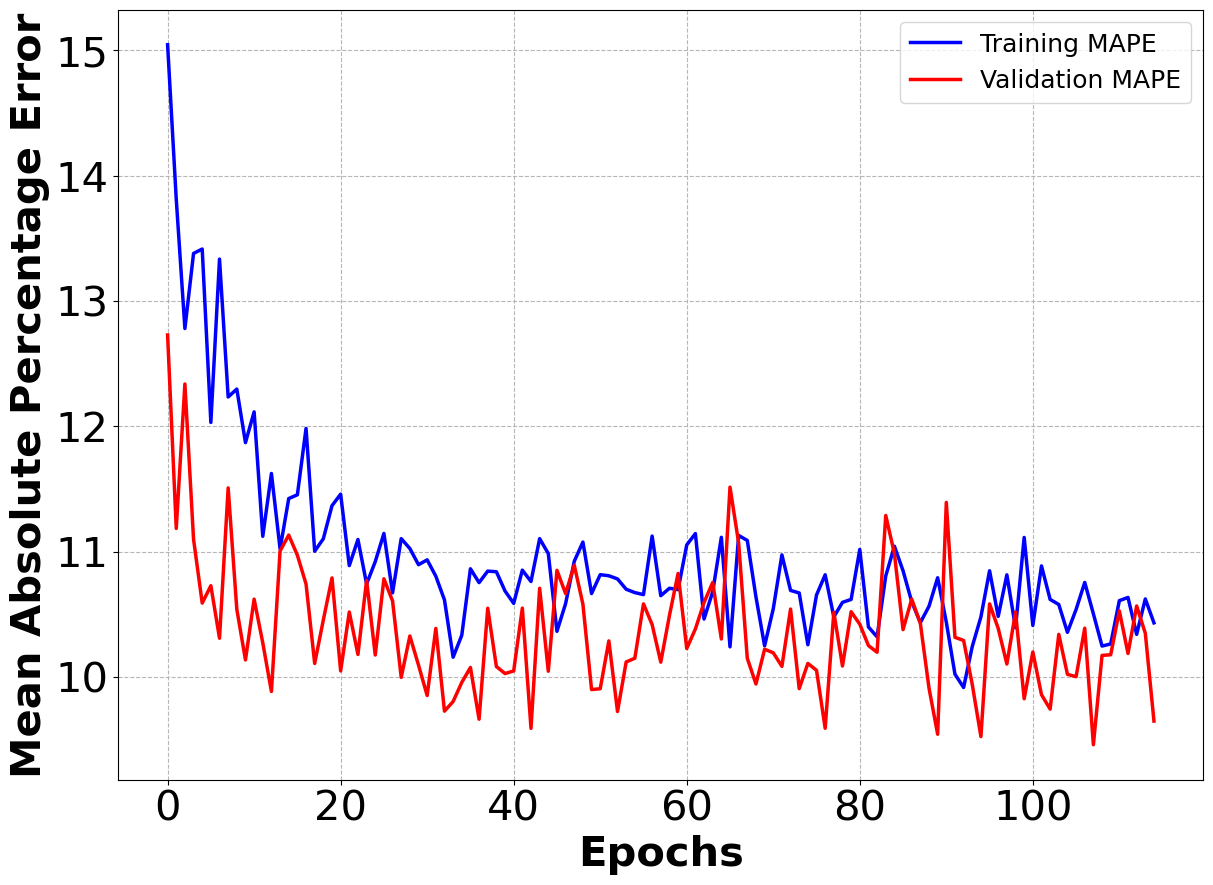

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined 'history' earlier

# Define custom colors and line styles
colors = ['blue', 'red']
line_styles = ['-', '-']

# Increase the figure size
plt.figure(figsize=(14, 10))

# Plot the training and validation MAPE with custom colors and line styles
plt.plot(history.history['mape'], label='Training MAPE', color=colors[0], linestyle=line_styles[0], linewidth=2.5)
plt.plot(history.history['val_mape'], label='Validation MAPE', color=colors[1], linestyle=line_styles[1], linewidth=2.5)

# Customize the legend
plt.legend(fontsize=18)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Set labels and adjust font size
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Mean Absolute Percentage Error', fontsize=30, fontweight='bold')

# Increase the font size of the ticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Save the plot as a high-quality image (e.g., PNG, PDF)
plt.savefig("MAPE.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [69]:
scaled_test = scaler.transform(unique_features2)

In [70]:
y_pred = model.predict(unique_features2)

81/81 [==============================] - 0s 1ms/step


In [71]:
y_pred = model.predict(scaled_test)

81/81 [==============================] - 0s 2ms/step


In [72]:
# Create a dataframe with the predicted values and the first column
df_predicted = pd.DataFrame({"Name": first_column, "PIC50 value": np.squeeze(y_pred)})

# Print the dataframe with the predicted values
df_predicted

,Name,PIC50 value
0,S1025,4.757944
1,S1039,6.182101
2,S1141,4.895453
3,S1142,4.790645
4,S1148,6.154681
...,...,...
2558,P1032,5.270278
2559,P1122,5.707697
2560,P1129,5.069562
2561,P1020,5.070549


In [73]:
df_predicted["PIC50 value"].describe()

count    2563.000000
mean        5.184309
std         0.440699
min         4.720531
25%         4.849636
50%         5.036414
75%         5.405492
max         7.143590
Name: PIC50 value, dtype: float64

In [74]:
# Calculate the threshold value
threshold = 0.75 * df_predicted['PIC50 value'].max()

# Filter the predicted values based on the threshold
df_filtered = df_predicted[df_predicted['PIC50 value'] >= threshold]

# Print the filtered dataframe
df_filtered

,Name,PIC50 value
1,S1039,6.182101
4,S1148,6.154681
5,S1150,6.090258
9,S1208,7.124685
11,S1223,7.124685
...,...,...
2552,S9177,5.546908
2553,E0178,5.554996
2556,E2438,5.750984
2557,E2484,5.861567


In [ ]:
! zip -r third.zip . -i *.png

  adding: MAE.png (deflated 29%)
  adding: MSE.png (deflated 30%)
  adding: MAPE.png (deflated 28%)
  adding: loss.png (deflated 38%)


# Anything after this, is Not Part of the model

In [ ]:
# Store the first column of the descriptors dataset
first_column = df4.iloc[:, 0]
first_column

0       1
1       1
2       1
3       1
4       1
       ..
2558    1
2559    1
2560    1
2561    1
2562    1
Name: PubchemFP0, Length: 2563, dtype: int64

In [ ]:
df4 = df4.iloc[:, 1:]
df4

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2559,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2560,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2561,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the df5 dataset into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Step 3: Model Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(881,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Step 4: Model Training
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_split, y_train_split, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Step 5: Model Evaluation
loss = model.evaluate(X_val, y_val)

# Step 6: Model Prediction
y_pred = model.predict(descriptors_scaled)

# Create a dataframe with the predicted values and the first column
df_predicted = pd.DataFrame({"Name": first_column, "PIC50 value": np.squeeze(y_pred)})

# Print the dataframe with the predicted values
print(df_predicted)

Epoch 1/100
24/24 [==============================] - 1s 6ms/step - loss: 5.5050 - val_loss: 1.6882
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0067 - val_loss: 1.0029
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7590 - val_loss: 0.8819
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6619 - val_loss: 0.8483
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5854 - val_loss: 0.7673
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5409 - val_loss: 0.7372
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4926 - val_loss: 0.6806
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4875 - val_loss: 0.7107
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4945 - val_loss: 0.6778
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4739 - val_loss: 0.7041
Epoch 11/

In [ ]:
df_predicted

,Name,PIC50 value
0,S1025,4.430250
1,S1039,5.658085
2,S1141,5.332438
3,S1142,4.405342
4,S1148,6.053642
...,...,...
1994,S6321,3.439031
1995,S6323,4.244670
1996,S6324,4.724030
1997,S6326,4.745142


In [ ]:
df_predicted["PIC50 value"].describe()


count    1999.000000
mean        4.419899
std         1.265913
min         0.713628
25%         3.567993
50%         4.418855
75%         5.214127
max         8.395977
Name: PIC50 value, dtype: float64

In [ ]:
# Calculate the threshold value
threshold = 0.75 * df_predicted['PIC50 value'].max()

# Filter the predicted values based on the threshold
df_filtered = df_predicted[df_predicted['PIC50 value'] >= threshold]

# Print the filtered dataframe
df_filtered


,Name,PIC50 value
1,S1039,5.869387
27,S1331,5.865443
32,S1381,6.122911
33,S1382,5.825176
41,S1514,6.232986
...,...,...
2540,E0201,6.056431
2546,S3309,6.322983
2557,E2484,6.003982
2559,P1122,5.959226


In [ ]:
df_filtered.rename(columns={'Name': 'Cat'}, inplace=True)
df_filtered

<ipython-input-76-a7c6f012b85f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'Name': 'Cat'}, inplace=True)


,Cat,PIC50 value
1,S1039,5.869387
27,S1331,5.865443
32,S1381,6.122911
33,S1382,5.825176
41,S1514,6.232986
...,...,...
2540,E0201,6.056431
2546,S3309,6.322983
2557,E2484,6.003982
2559,P1122,5.959226


In [ ]:
df_rows.columns

Index(['mol', 'Mol_ID', 'Formula', 'MolWeight', 'Cat', 'Name', 'Synonyms',
       'Target', 'Form', 'CAS'],
      dtype='object')

In [ ]:
df_filtered.columns

Index(['Cat', 'PIC50 value'], dtype='object')

### **Data splitting**

In [ ]:
import pandas as pd

merged_df = pd.merge(df_rows, df_filtered, on="Cat", how="inner")
merged_df

,mol,Mol_ID,Formula,MolWeight,Cat,Name,Synonyms,Target,Form,CAS,PIC50 value
0,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,2,C51H79NO13,914.171860,S1039,Rapamycin (Sirolimus),N/A,mTOR,Free Base,53123-88-9,5.869387
1,OC(CN1C=NC=N1)(CN1C=NC=N1)C1=C(F)C=C(F)C=C1,28,C13H12F2N6O,306.270786,S1331,Fluconazole,UK 49858,P450 (e.g. CYP17),Free Base,86386-73-4,5.865443
2,CC(O)C1C2C(C)C(SC3CNC(C3)C(=O)N(C)C)=C(N2C1=O)...,33,C17H25N3O5S,383.462500,S1381,Meropenem,SM 7338,Antifection,Free Base,96036-03-2,6.122911
3,Cl.CN1CCN2C(C1)C1=C(CC3=C2C=CC=C3)C=CC=C1,34,C18H21ClN2,300.825740,S1382,Mianserin HCl,ORG GB-94 HCl,Histamine Receptor(HT receptor),Hydrochloride,21535-47-7,5.825176
4,CCC1NC(=O)C([C@H](O)[C@H](C)C\\C=C\\C)N(C)C(=O...,42,C62H111N11O12,1202.611240,S1514,Cyclosporine (Neoral),"Sandimmune, Gengraf, Restasis, Atopica, Sangcya",phosphatase,Free Base,79217-60-0,6.232986
...,...,...,...,...,...,...,...,...,...,...,...
181,[H][C@@]12C[C@@]3(O)[C@H](OC(=O)C4=CC=CC=C4)[C...,2544,C33H45NO10,615.711100,E0201,Hypaconitine,free base,6900-87-4,NaN,NaN,6.056431
182,[H][C@]12C[C@@]3([H])[C@]4([H])CC=C5C[C@@H](O)...,2550,C27H43NO2,413.635820,S3309,Solasodine,free base,126-17-0,NaN,NaN,6.322983
183,[H][C@@]1(OC(=O)C2=C(OC)C(OC)=CC=C12)[C@]1([H]...,2561,C21H21NO6,383.394540,E2484,(-)-Hydrastine,Free base,118-08-1,NaN,NaN,6.003982
184,[H]N[C@@H](CC1=CC=C(O)C=C1)C(=O)N1CCC[C@H]1C(=...,2563,C189H285N55O57S,4271.684500,P1122,Neuropeptide Y,Free base,90880-35-6,NaN,NaN,5.959226


In [ ]:
merged_df.to_csv('one.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('one_two.csv')

df

,mol,Mol_ID,Formula,MolWeight,Cat,Name,Synonyms,Target,Form,CAS,PIC50 value
0,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,2,C51H79NO13,914.171860,S1039,Rapamycin (Sirolimus),N/A,mTOR,Free Base,53123-88-9,5.869387
1,OC(CN1C=NC=N1)(CN1C=NC=N1)C1=C(F)C=C(F)C=C1,28,C13H12F2N6O,306.270786,S1331,Fluconazole,UK 49858,P450 (e.g. CYP17),Free Base,86386-73-4,5.865443
2,CC(O)C1C2C(C)C(SC3CNC(C3)C(=O)N(C)C)=C(N2C1=O)...,33,C17H25N3O5S,383.462500,S1381,Meropenem,SM 7338,Antifection,Free Base,96036-03-2,6.122911
3,Cl.CN1CCN2C(C1)C1=C(CC3=C2C=CC=C3)C=CC=C1,34,C18H21ClN2,300.825740,S1382,Mianserin HCl,ORG GB-94 HCl,Histamine Receptor(HT receptor),Hydrochloride,21535-47-7,5.825176
4,CCC1NC(=O)C([C@H](O)[C@H](C)C\\C=C\\C)N(C)C(=O...,42,C62H111N11O12,1202.611240,S1514,Cyclosporine (Neoral),"Sandimmune, Gengraf, Restasis, Atopica, Sangcya",phosphatase,Free Base,79217-60-0,6.232986
...,...,...,...,...,...,...,...,...,...,...,...
181,[H][C@@]12C[C@@]3(O)[C@H](OC(=O)C4=CC=CC=C4)[C...,2544,C33H45NO10,615.711100,E0201,Hypaconitine,free base,6900-87-4,NaN,NaN,6.056431
182,[H][C@]12C[C@@]3([H])[C@]4([H])CC=C5C[C@@H](O)...,2550,C27H43NO2,413.635820,S3309,Solasodine,free base,126-17-0,NaN,NaN,6.322983
183,[H][C@@]1(OC(=O)C2=C(OC)C(OC)=CC=C12)[C@]1([H]...,2561,C21H21NO6,383.394540,E2484,(-)-Hydrastine,Free base,118-08-1,NaN,NaN,6.003982
184,[H]N[C@@H](CC1=CC=C(O)C=C1)C(=O)N1CCC[C@H]1C(=...,2563,C189H285N55O57S,4271.684500,P1122,Neuropeptide Y,Free base,90880-35-6,NaN,NaN,5.959226


In [ ]:
# Rename the values in the 'identity' column
df['Mol_ID'] = df['Mol_ID'].apply(lambda x: f'{x}.cdx')

# Save the updated DataFrame back to a new CSV file or overwrite the existing one
df.to_csv('updated_file.csv', index=False)

In [ ]:
df = pd.read_csv('updated_file.csv')
df

,mol,Mol_ID,Formula,MolWeight,Cat,Name,Synonyms,Target,Form,CAS,PIC50 value
0,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,2.cdx,C51H79NO13,914.171860,S1039,Rapamycin (Sirolimus),N/A,mTOR,Free Base,53123-88-9,5.869387
1,OC(CN1C=NC=N1)(CN1C=NC=N1)C1=C(F)C=C(F)C=C1,28.cdx,C13H12F2N6O,306.270786,S1331,Fluconazole,UK 49858,P450 (e.g. CYP17),Free Base,86386-73-4,5.865443
2,CC(O)C1C2C(C)C(SC3CNC(C3)C(=O)N(C)C)=C(N2C1=O)...,33.cdx,C17H25N3O5S,383.462500,S1381,Meropenem,SM 7338,Antifection,Free Base,96036-03-2,6.122911
3,Cl.CN1CCN2C(C1)C1=C(CC3=C2C=CC=C3)C=CC=C1,34.cdx,C18H21ClN2,300.825740,S1382,Mianserin HCl,ORG GB-94 HCl,Histamine Receptor(HT receptor),Hydrochloride,21535-47-7,5.825176
4,CCC1NC(=O)C([C@H](O)[C@H](C)C\\C=C\\C)N(C)C(=O...,42.cdx,C62H111N11O12,1202.611240,S1514,Cyclosporine (Neoral),"Sandimmune, Gengraf, Restasis, Atopica, Sangcya",phosphatase,Free Base,79217-60-0,6.232986
...,...,...,...,...,...,...,...,...,...,...,...
181,[H][C@@]12C[C@@]3(O)[C@H](OC(=O)C4=CC=CC=C4)[C...,2544.cdx,C33H45NO10,615.711100,E0201,Hypaconitine,free base,6900-87-4,NaN,NaN,6.056431
182,[H][C@]12C[C@@]3([H])[C@]4([H])CC=C5C[C@@H](O)...,2550.cdx,C27H43NO2,413.635820,S3309,Solasodine,free base,126-17-0,NaN,NaN,6.322983
183,[H][C@@]1(OC(=O)C2=C(OC)C(OC)=CC=C12)[C@]1([H]...,2561.cdx,C21H21NO6,383.394540,E2484,(-)-Hydrastine,Free base,118-08-1,NaN,NaN,6.003982
184,[H]N[C@@H](CC1=CC=C(O)C=C1)C(=O)N1CCC[C@H]1C(=...,2563.cdx,C189H285N55O57S,4271.684500,P1122,Neuropeptide Y,Free base,90880-35-6,NaN,NaN,5.959226
